# Finding optimal parameters

Suppose we want to minimize OAR average dose subject to a PTV D95 constraint.
One simple, but inefficient, way is to do a coarse grid search.
Here we only look at modifying the OAR dose and volume parameters, but we could also search over the PTV dose parameter and the OAR and PTV weights.
Of course, the  more parameters (and organs) we add, the more dimensions we have to contend with, so all the more reason to find a more efficient method.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Approved plan results
dose = 2000.0
volume = 10.0
weight = 90.0
average = 318.4594544159879
d95 = 4800.13222492 

In [3]:
# Load results
doses = np.load('doses.npy')
volumes = np.load('volumes.npy')
oar_avg = np.load('oar_avg_dv.npy')
ptv_d95 = np.load('ptv_d95_dv.npy')

In [4]:
# Interpolate bad values
ptv_d95[0, 2] = (ptv_d95[0, 1] + ptv_d95[0, 3])/2.0
oar_avg[0, 2] = (oar_avg[0, 1] + oar_avg[0, 3])/2.0

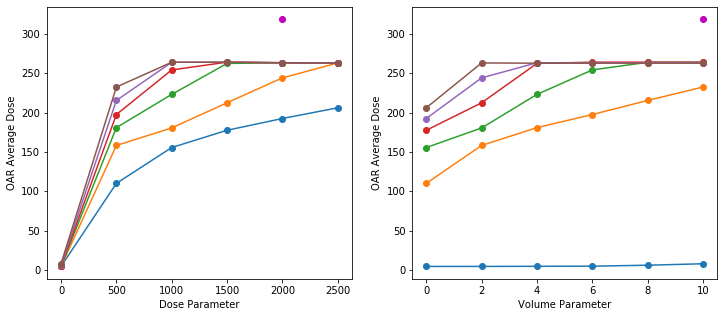

In [7]:
# Plot OAR dose vs. OAR dose and percent parameters 
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for ii in range(len(doses)):
    ax[0].plot(doses, oar_avg[:, ii], 'o-')
    ax[1].plot(volumes, oar_avg[ii, :], 'o-')
ax[0].plot(dose, average, 'mo')
ax[1].plot(volume, average, 'mo')

ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('OAR Average Dose')
ax[1].set_xlabel('Volume Parameter')
ax[1].set_ylabel('OAR Average Dose');

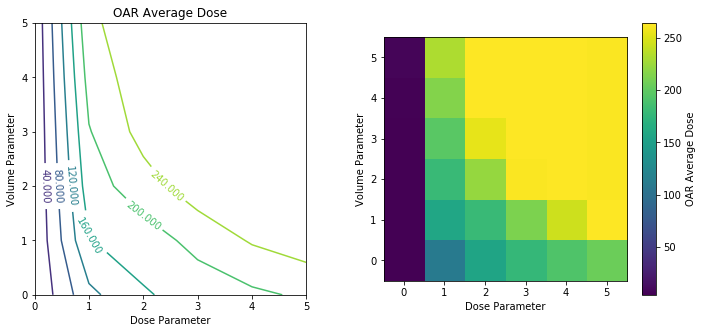

In [9]:
# Plot OAR dose vs. OAR dose and percent parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

im0 = ax[0].contour(oar_avg.T)
ax[0].clabel(im0)
ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('Volume Parameter')
ax[0].set_title('OAR Average Dose')
ax[0].axis('square')

im1 = ax[1].imshow(oar_avg.T, origin='lower')
ax[1].set_xlabel('Dose Parameter')
ax[1].set_ylabel('Volume Parameter')
plt.colorbar(im1, label='OAR Average Dose');

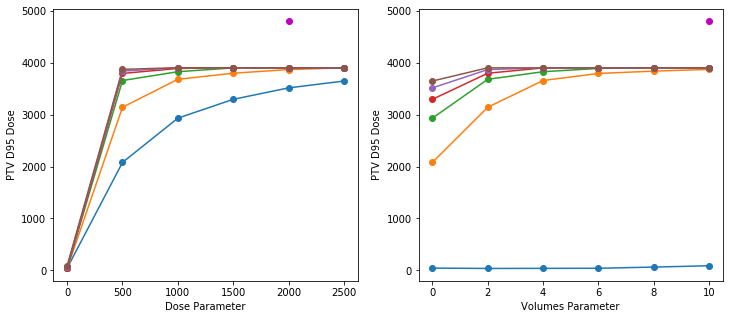

In [10]:
# Plot PTV D95 vs. OAR dose and percent parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for ii in range(len(doses)):
    ax[0].plot(doses, ptv_d95[:, ii], 'o-')
    ax[1].plot(volumes, ptv_d95[ii, :], 'o-')
ax[0].plot(dose, d95, 'mo')
ax[1].plot(volume, d95, 'mo')

ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('PTV D95 Dose')
ax[1].set_xlabel('Volumes Parameter')
ax[1].set_ylabel('PTV D95 Dose');

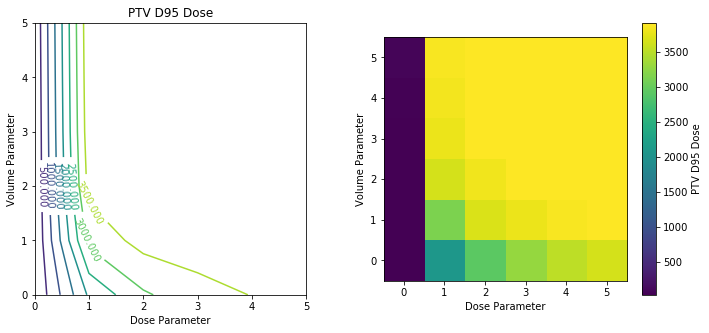

In [78]:
# Plot PTV D95 vs. OAR dose and percent parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

im0 = ax[0].contour(ptv_d95.T)
ax[0].clabel(im0)
ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('Volume Parameter')
ax[0].set_title('PTV D95 Dose')
ax[0].axis('square')

im1 = ax[1].imshow(ptv_d95.T, origin='lower')
ax[1].set_xlabel('Dose Parameter')
ax[1].set_ylabel('Volume Parameter')
plt.colorbar(im1, label='PTV D95 Dose');

Suppose we want to minimize OAR dose subject to PTV D95 dose >= 3800.

In [79]:
min_dose = 1e6
opt_dose = -1
opt_volume = -1
for ii in range(len(doses)):
    for jj in range(len(volumes)):
        if ptv_d95[ii, jj] >= 3800:
            if oar_avg[ii, jj] < min_dose:
                min_dose = oar_avg[ii, jj]
                opt_dose =  doses[ii]
                opt_volume = volumes[jj]
print(f'Dose: {opt_dose}, Volume: {opt_volume}, Min dose: {min_dose}')

Dose: 500.0, Volume: 8.0, Min dose: 215.38688865777647


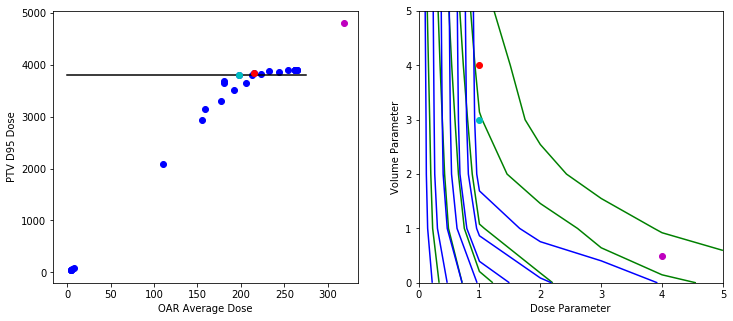

In [25]:
# Plot PTV D95 vs. OAR dose
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for ii in range(len(doses)):
    for jj in range(len(volumes)):
        ax[0].plot(oar_avg[ii, jj], ptv_d95[ii, jj], 'bo')
ax[0].set_xlabel('OAR Average Dose')
ax[0].set_ylabel('PTV D95 Dose')
ax[0].plot([0, 275], [3800, 3800], 'k')
ax[0].plot(oar_avg[1, 4], ptv_d95[1, 4], 'ro') # optimal point
ax[0].plot(oar_avg[1, 3], ptv_d95[1, 3], 'co') # optimal normalized point
ax[0].plot(average, d95, 'mo')                 # approved point

ax[1].contour(oar_avg.T, colors='g')
ax[1].contour(ptv_d95.T, colors='b')
ax[1].plot(1, 4, 'ro')   # optimal point
ax[1].plot(1, 3, 'co')   # optimal normalized point
ax[1].plot(4, 0.5, 'mo') # approved point
ax[1].set_xlabel('Dose Parameter')
ax[1].set_ylabel('Volume Parameter');

Text(0, 0.5, 'Scaled OAR Dose')

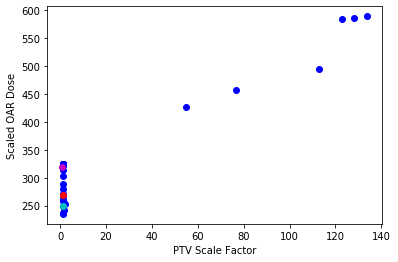

In [32]:
# Does the best point have anything to do with the ratio of the two values?
for ii in range(len(doses)):
    for jj in range(len(volumes)):
        alpha = 4800.0/ptv_d95[ii, jj]
        scaled_dose = alpha*oar_avg[ii, jj]
        plt.plot(alpha, scaled_dose, 'bo')

# optimal point
alpha = 4800.0/ptv_d95[1, 4]
scaled_dose = alpha*oar_avg[1, 4]
plt.plot(alpha, scaled_dose, 'ro')

# optimal normalized point
alpha = 4800.0/ptv_d95[1, 3]
scaled_dose = alpha*oar_avg[1, 3]
plt.plot(alpha, scaled_dose, 'co')

# optimal normalized point
alpha = 4800.0/d95
scaled_dose = alpha*average
plt.plot(alpha, scaled_dose, 'mo')

plt.xlabel('PTV Scale Factor')
plt.ylabel('Scaled OAR Dose')

Text(0, 0.5, 'OAR to PTV Ratio')

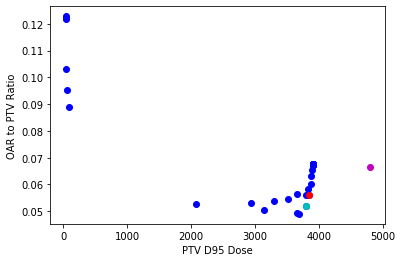

In [35]:
for ii in range(len(doses)):
    for jj in range(len(volumes)):
        ratio = oar_avg[ii, jj]/ptv_d95[ii, jj]
        plt.plot(ptv_d95[ii, jj], ratio, 'bo')

# optimal point
ratio = oar_avg[1, 4]/ptv_d95[1, 4]
plt.plot(ptv_d95[1, 4], ratio, 'ro')

# optimal normalized point
ratio = oar_avg[1, 3]/ptv_d95[1, 3]
plt.plot(ptv_d95[1, 3], ratio, 'co')

# optimal normalized point
ratio = average/d95
plt.plot(d95, ratio, 'mo')

plt.xlabel('PTV D95 Dose')
plt.ylabel('OAR to PTV Ratio')